In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import datetime
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import RFE
pd.options.display.max_colwidth = 200
pd.options.display.max_rows=100
pd.options.display.max_columns=500
import warnings
warnings.filterwarnings('ignore')

In [50]:
data = pd.read_csv('../input/house-assignment/train_1.csv')

### 1. Basic Analysis

In [51]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [53]:
print(data.shape)

(1460, 81)


In [54]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


****As the mean and median are substantially apart from each other,it wont be distributed normally for the salesprice****

In [55]:

#Removed features which have more than 40% of data as null
for x in data:
    if ((data[x].isna().sum()/len(data)*100)>40):
        data.drop(columns=x, inplace=True)
        
NA_col = data.isnull().sum()
NA_col = NA_col[NA_col > 0]
print(round(100*NA_col[NA_col > 0]/len(data),2))

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64


### 2. Data correction treatment

> Removing some features which are not adding any value
- Id,MoSold,Street,Utilities,LotFrontage

In [56]:
data.drop(['Id','LotFrontage', 'MoSold','Street', 'Utilities'], axis=1, inplace = True)

In [57]:
data.shape

(1460, 71)

In [58]:
def fill_Missing_Values(df):    
    NA_col = df.isnull().sum()
    NA_col = NA_col[NA_col > 0]

    for col in NA_col.index:
        if df[col].dtype.name == 'object':
            df[col].fillna(data[col].mode()[0], inplace=True)
            
        elif df[col].dtype.name == 'float64' or df[col].dtype.name == 'int64' or df[col].dtype.name == 'int32':
            df[col] = df[col].fillna((df[col].median()))
            
        else:
            print('unknown', col)
            
    return df

data = fill_Missing_Values(data)

In [59]:
# Converting years to age and removing the redundant columns
data['YearBuilt_Age'] = data['YearBuilt'].max() - data['YearBuilt']
data['YearRemodAdd_Age'] = data['YearRemodAdd'].max() - data['YearRemodAdd']
data['YrSold_Age'] = data['YrSold'].max() - data['YrSold']
data['GarageYrBlt_Age'] = data['GarageYrBlt'].max() - data['GarageYrBlt']
data.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)
data[['YearBuilt_Age','YearRemodAdd_Age','YrSold_Age','GarageYrBlt_Age']].head(5)

,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,7,7,2,7.0
1,34,34,3,34.0
2,9,8,2,9.0
3,95,40,4,12.0
4,10,10,2,10.0


### 3. EDA - find the variables which are significant to the target variable

#### Heatmap

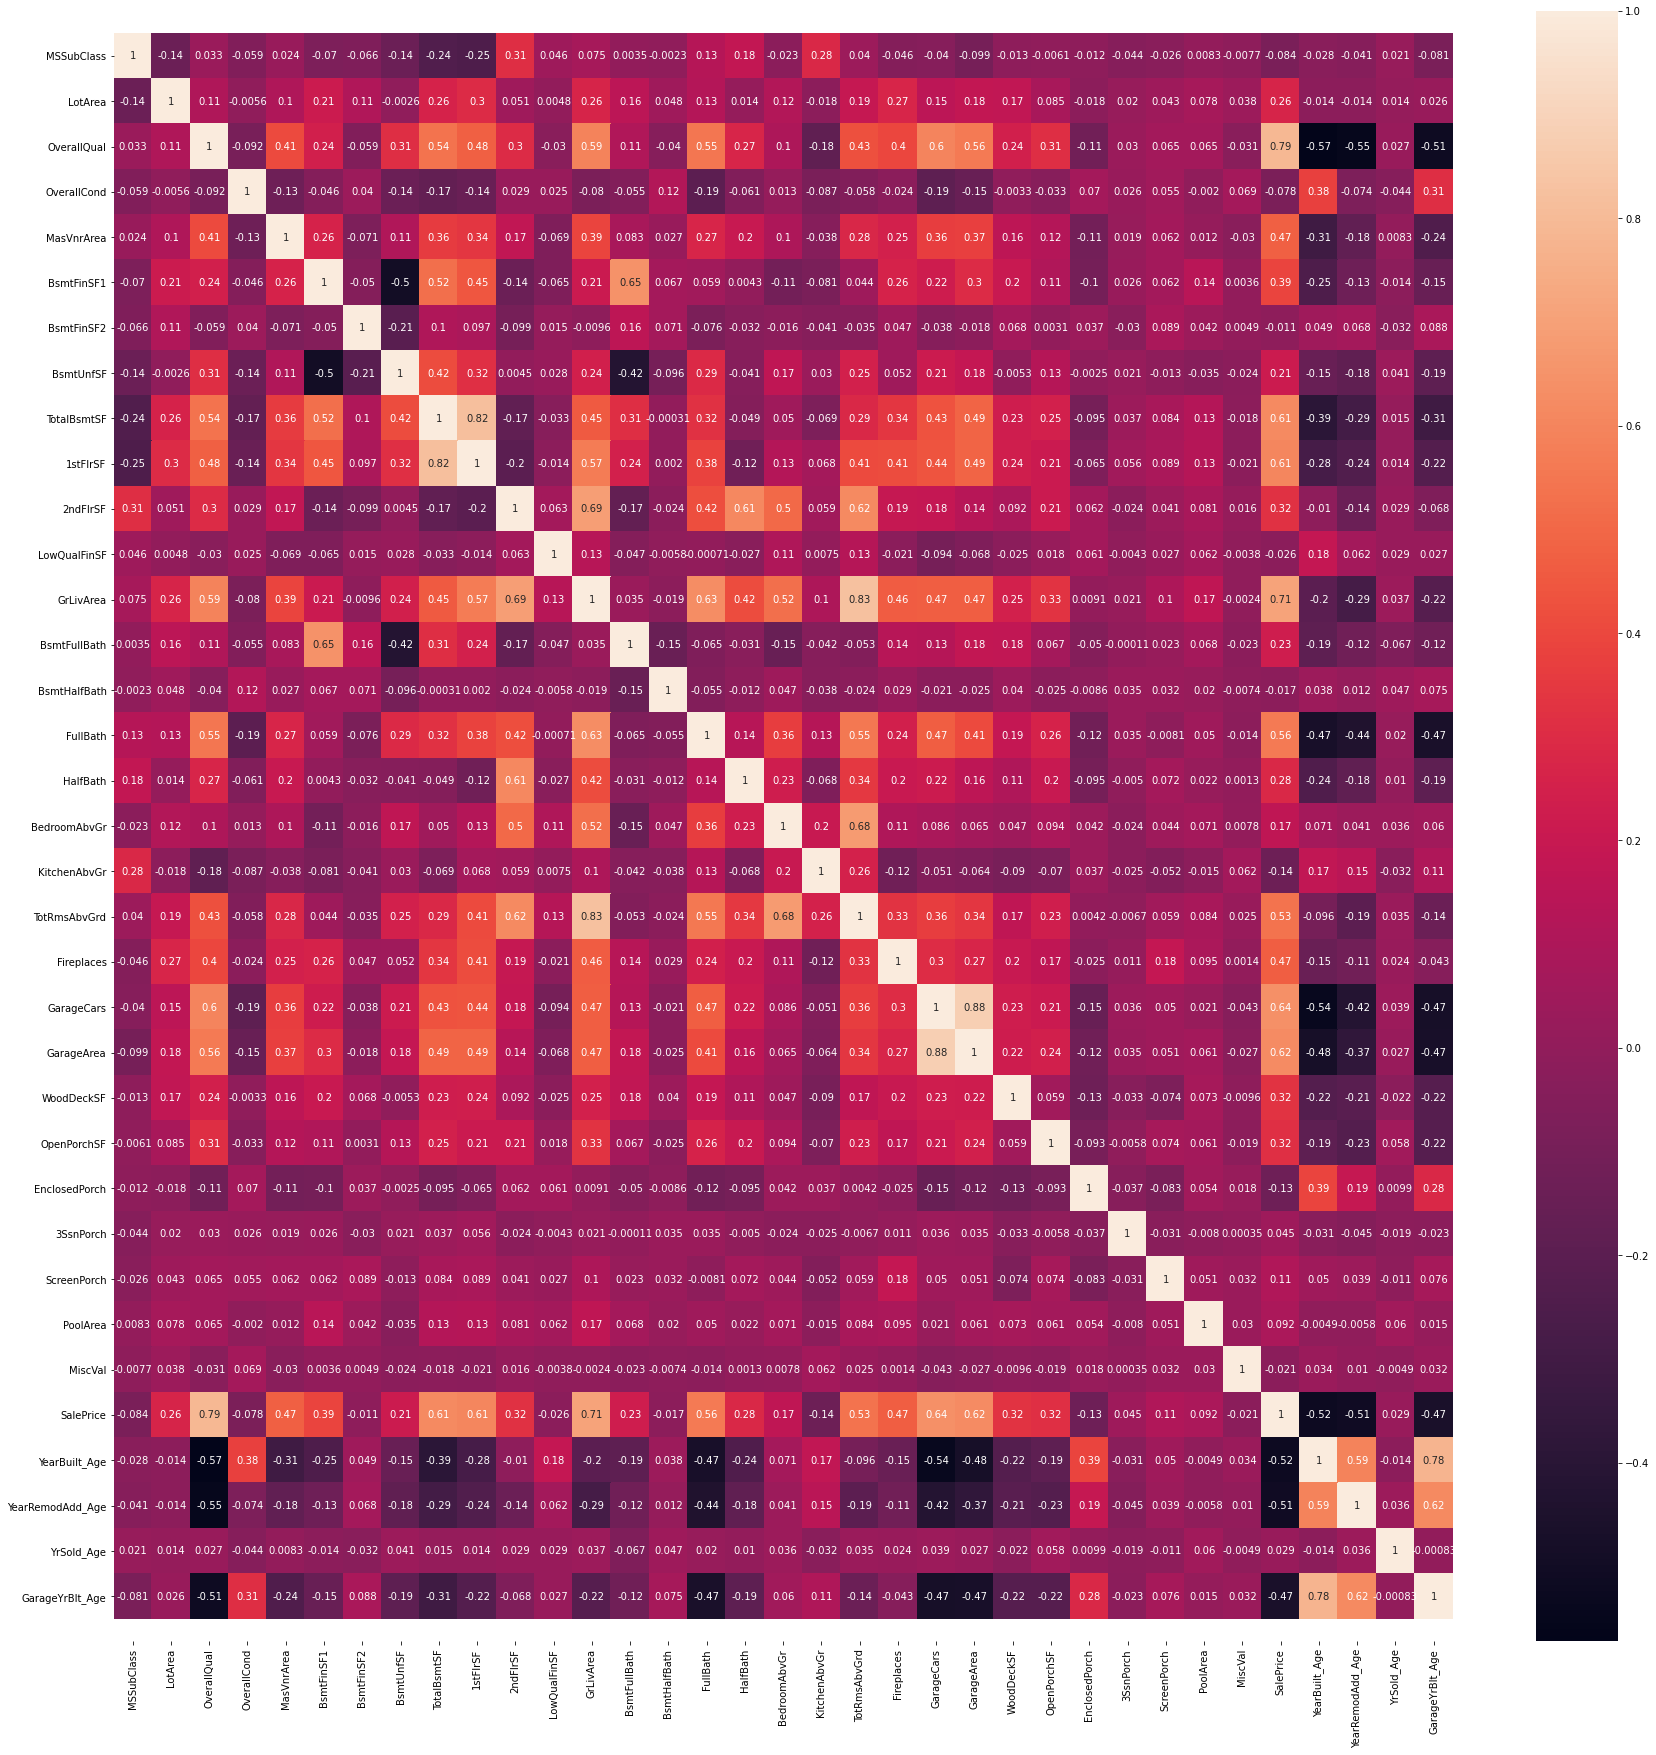

In [60]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(data.corr(), 
            xticklabels=data.corr().columns.values,
            yticklabels=data.corr().columns.values,annot= True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [61]:
corr_val = data[list(data.dtypes[data.dtypes != 'object'].index)].corr()
corr_coef = corr_val[corr_val['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [x for x in corr_coef.index]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


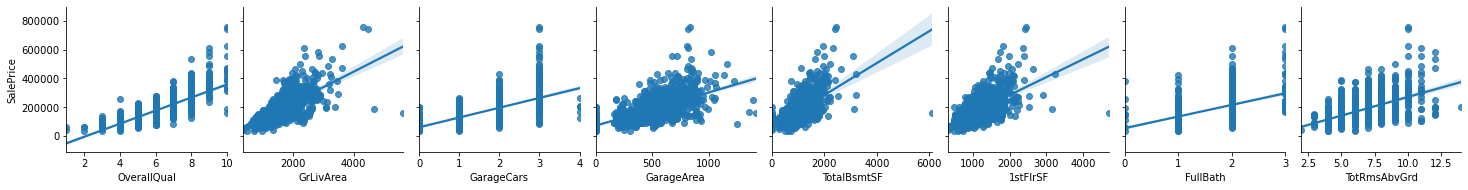

In [62]:
# examine the plots for the heavily correlated features
sns.pairplot(data, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg" )

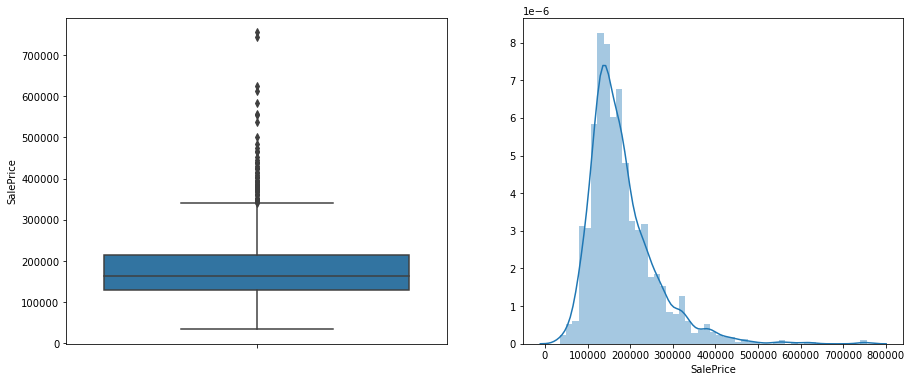

In [63]:
f, axes = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(data['SalePrice'],  orient='v' , ax=axes[0])
sns.distplot(data['SalePrice'], ax=axes[1])
plt.show()

### 4. Feature engineering

#### Label Encoding

In [64]:
def label_encoding(colNames):
    for colName in colNames:
        unique_vals = data[colName].unique()
        map_vals = {}
        for idx, val in enumerate(unique_vals):
            map_vals[val] = idx
        data[colName] = data[colName].map(map_vals)

In [65]:
cat_col_list = ['LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 
                'GarageFinish', 'GarageQual', 'GarageCond', 'ExterCond', 'LotShape']
label_encoding(cat_col_list)

In [66]:
data[cat_col_list].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1
3,0,1,1,1,0,1,0,1,0,0,1,0,0,0,1
4,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1


#### One Hot Encoding

In [67]:
dummy_col_names = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']
dummies = pd.get_dummies(data[dummy_col_names], drop_first = True)
data = pd.concat([data, dummies], axis = 1)
data.drop(dummy_col_names, axis = 1, inplace = True)

In [68]:
data.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,0,0,7,5,196.0,0,0,0,0,0,0,706,0,0,150,856,0,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,2,548,0,0,0,61,0,0,0,0,0,208500,7,7,2,7.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,0,0,6,8,0.0,1,0,0,0,1,1,978,0,0,284,1262,0,0,1262,0,0,1262,0,1,2,0,3,1,1,6,1,0,2,460,0,0,298,0,0,0,0,0,0,181500,34,34,3,34.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,1,0,7,5,162.0,0,0,0,0,2,0,486,0,0,

In [69]:
data.shape

(1460, 195)

#### Target variable transformation
# **We should use log transformation as the salesprice is right skewed**

In [70]:
# Transform SalePrice
data['SalePrice'] = np.log1p(data['SalePrice'])

### 5. Model Preparation

In [71]:
# Create train and test data
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [72]:
# Scale data
scaler_col = ['MSSubClass','LotArea','OverallQual','OverallCond', 'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF', 'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea','MiscVal','SalePrice']
scaler = StandardScaler()
df_train[scaler_col] = scaler.fit_transform(df_train[scaler_col])
df_test[scaler_col] = scaler.transform(df_test[scaler_col])

In [73]:
df_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.473765,0,0,-0.779861,0.383154,-0.558025,1,0,1,0,0,3,0.043512,0,-0.293313,-0.374367,-0.430911,2,1,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,1,-0.935650,-0.925422,1,-2.366798,-2.217786,0,0,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,-1.335436,85,60,2,30.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
318,0.035976,-0.056845,0,1,0.649651,-0.533005,0.809137,0,0,0,0,1,0,1.160345,0,-0.293313,-0.454644,0.621579,0,0,0.511914,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,0,1.556976,0.623522,0,1.645101,0.867506,0,0,1.

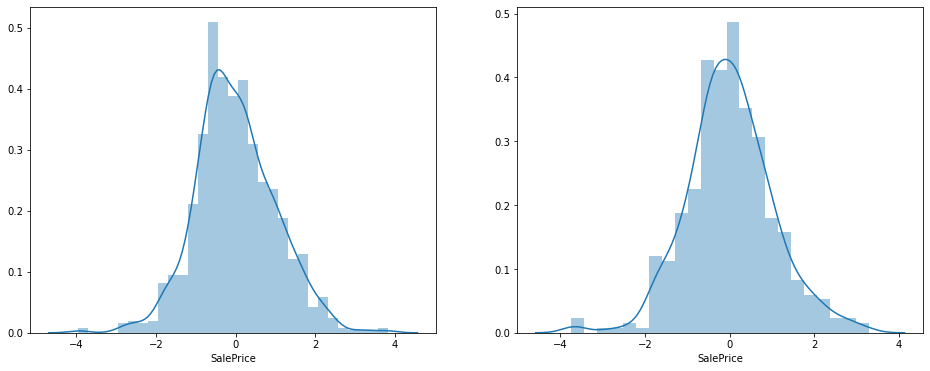

In [74]:
# Check the normality of both the test and train data
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [75]:
# Create X and y
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [76]:
# RFE
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)
print(pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_))))
print(X_train.columns[rfe.support_])

                         0      1    2
0               MSSubClass  False   50
1                  LotArea  False   37
2                 LotShape  False  115
3                LandSlope  False  108
4              OverallQual   True    1
..                     ...    ...  ...
189  SaleCondition_AdjLand  False   22
190   SaleCondition_Alloca  False   27
191   SaleCondition_Family  False   56
192   SaleCondition_Normal   True    1
193  SaleCondition_Partial   True    1

[194 rows x 3 columns]
Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blueste',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_RRNe', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Cond

In [77]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
print(rfe_scores)

                         0      1    2
0               MSSubClass  False   50
1                  LotArea  False   37
2                 LotShape  False  115
3                LandSlope  False  108
4              OverallQual   True    1
..                     ...    ...  ...
189  SaleCondition_AdjLand  False   22
190   SaleCondition_Alloca  False   27
191   SaleCondition_Family  False   56
192   SaleCondition_Normal   True    1
193  SaleCondition_Partial   True    1

[194 rows x 3 columns]


In [78]:
col = X_train.columns[rfe.support_]

In [79]:
col

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blueste',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_RRNe', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRNn', 'BldgType_Twnhs',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_VinylSd', 'Exterior2nd_AsphShn',
       'Exterior2nd_Stucco', 'Heating_GasA', 'Heating_GasW', 'Heating_Wall',
       'Functional_Mod', 'Functional_Sev', 'SaleType_ConLD', 'SaleType_New',
       'SaleCo

In [80]:
# Modify the X_train and X_test
X_train = X_train[col]
X_test = X_test[col]

In [81]:
print(X_train.shape)
print(X_test.shape)

(1021, 50)
(438, 50)


### Lasso Regression model

In [114]:
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

print(mean_squared_error(y_test,y_test_pred))

0.9020048169908691
0.8709116585471446
0.1351233132887999


In [83]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col = col.insert(0,'Constant')
list(zip(col,model_parameter))

[('Constant', -1.07),
 ('OverallQual', 0.399),
 ('BsmtFinSF1', 0.107),
 ('BsmtFinSF2', 0.036),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.009),
 ('CentralAir', -0.465),
 ('1stFlrSF', 0.326),
 ('2ndFlrSF', 0.281),
 ('MSZoning_FV', 0.143),
 ('MSZoning_RH', 0.155),
 ('MSZoning_RL', 0.357),
 ('MSZoning_RM', 0.054),
 ('Neighborhood_Blueste', 0.0),
 ('Neighborhood_ClearCr', 0.456),
 ('Neighborhood_Crawfor', 0.295),
 ('Neighborhood_NridgHt', 0.259),
 ('Neighborhood_Somerst', 0.38),
 ('Neighborhood_Veenker', 0.372),
 ('Condition1_Norm', 0.199),
 ('Condition1_PosA', 0.272),
 ('Condition1_RRNe', 0.0),
 ('Condition2_Feedr', 0.0),
 ('Condition2_Norm', 0.0),
 ('Condition2_PosA', 0.0),
 ('Condition2_PosN', -2.604),
 ('Condition2_RRAe', 0.0),
 ('Condition2_RRNn', 0.0),
 ('BldgType_Twnhs', -0.304),
 ('RoofStyle_Shed', 0.0),
 ('RoofMatl_CompShg', 0.33),
 ('RoofMatl_Membran', 0.0),
 ('RoofMatl_Metal', 0.0),
 ('RoofMatl_Roll', 0.0),
 ('RoofMatl_Tar&Grv', 0.053),
 ('RoofMatl_WdShake', 0.0),
 ('RoofMatl_WdSh

In [84]:
# Gridsearch Operation
# Objective - Find optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)
hyper_param = {'alpha':[0.0001,0.001,0.01,0.1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0]}
model = Lasso()
model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.0s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [85]:
cv_result_train_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_train_lasso['param_alpha'] = cv_result_train_lasso['param_alpha'].astype('float32')
cv_result_train_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.014844,0.001964,0.003369,0.000233,0.0001,{'alpha': 0.0001},0.889187,0.388009,0.884469,0.678674,0.485124,0.907089,0.558714,0.364606,0.884923,0.849857,0.689065,0.210851,4,0.911409,0.910286,0.911683,0.911902,0.907948,0.909737,0.908274,0.910981,0.911130,0.914134,0.910748,0.001718
1,0.007925,0.001453,0.003162,0.000257,0.0010,{'alpha': 0.001},0.870668,0.402176,0.873321,0.705079,0.895881,0.904751,0.869943,0.867922,0.865390,0.856578,0.811171,0.146131,1,0.863708,0.900250,0.866028,0.866736,0.861581,0.860417,0.862876,0.867340,0.866044,0.868514,0.868349,0.010919
2,0.005781,0.000407,0.002957,0.000109,0.0100,{'alpha': 0.01},0.841054,0.425797,0.849393,0.682572,0.872642,0.865574,0.820406,0.860123,0.838789,0.840377,0.789673,0.131765,2,0.814563,0.853620,0.815800,0.829594,0.810328,0.810494,0.813721,0.812757,0.815623,0.816503,0.819300,0.012537
3,0.005294,0.000226,0.003026,0.000195,0.1000,{'alpha': 0.1},0.769381,0.530241,0.746960,0.621209,0.801691,0.757630,0.684736,0.767374,0.721519,0.764800,0.716554,0.078995,3,0.723598,0.772030,0.732266,0.749314,0.722370,0.725712,0.734686,0.727918,0.731180,0.725807,0.734488,0.014513
4,0.005180,0.000542,0.002930,0.000230,1.0000,{'alpha': 1.0},-0.015358,-0.033031,-0.002682,-0.002716,-0.055402,-0.003338,-0.004699,-0.001490,-0.000359,-0.001537,-0.012061,0.017303,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [115]:
def r2_score(cv_result, is_log=False):
    plt.figure(figsize=(12,6))
    plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
    plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
    if is_log == True:
        plt.xscale('log')
    plt.ylabel('R2 Score')
    plt.xlabel('Alpha')
    plt.show()

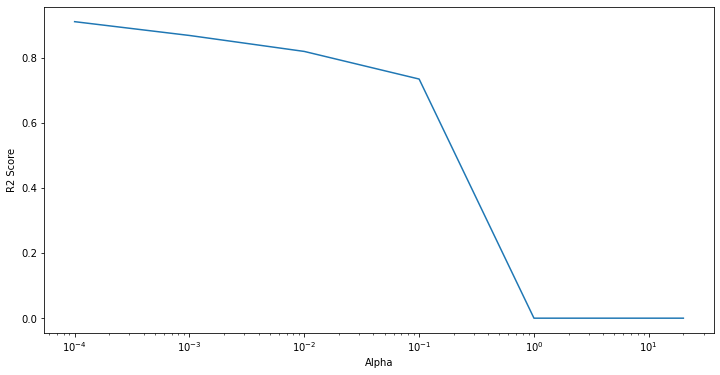

In [116]:
r2_score(cv_result_train_lasso, True)

In [88]:
print('For Lasso, the Best Alpha value = ', model_cv.best_params_['alpha'])

For Lasso, the Best Alpha value =  0.001


In [89]:
# Now that we have optimal value of alpha = 0.001, we can use this alpha to run the model again
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8653191073528599
0.8332269985340148


### Lasso Results on Test dataset
    *** R2 score = 0.8332 ***

### Ridge Regression Model

In [90]:
#Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

# train score
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))

# test score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_test_pred))

0.9109942687762023
0.8184004290380734


In [91]:
# Gridsearch Operation
# Objective - Find optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.0001,0.001,0.01,0.1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [92]:
cv_result_train_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_train_ridge['param_alpha'] = cv_result_train_ridge['param_alpha'].astype('float32')
cv_result_train_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005164,0.000878,0.003109,0.000270,0.0001,{'alpha': 0.0001},0.889873,0.390764,0.883795,0.680209,0.371719,0.904125,0.474867,0.232540,0.886979,0.848604,0.656347,0.249495,15,0.912332,0.910565,0.912576,0.912766,0.908616,0.910660,0.909010,0.911685,0.912005,0.915023,0.911524,0.001796
1,0.005217,0.000634,0.002988,0.000405,0.0010,{'alpha': 0.001},0.889857,0.390857,0.883771,0.680750,0.380432,0.904193,0.481911,0.242129,0.887033,0.848667,0.658960,0.246379,14,0.912327,0.910565,0.912572,0.912762,0.908613,0.910656,0.909006,0.911682,0.912000,0.915019,0.911520,0.001795
2,0.004852,0.000241,0.002913,0.000157,0.0100,{'alpha': 0.01},0.889627,0.391773,0.883419,0.685483,0.456776,0.904745,0.543579,0.326648,0.887328,0.849129,0.681851,0.219952,13,0.911947,0.910561,0.912205,0.912408,0.908323,0.910271,0.908708,0.911410,0.911628,0.914640,0.911210,0.001756
3,0.004721,0.000313,0.002749,0.000079,0.1000,{'alpha': 0.1},0.886580,0.399756,0.878396,0.703786,0.756069,0.906010,0.782978,0.671847,0.883725,0.849135,0.771828,0.146446,12,0.901355,0.910292,0.902022,0.902539,0.899201,0.899526,0.899308,0.902729,0.901365,0.904138,0.902248,0.003091
4,0.005030,0.000436,0.002860,0.000151,1.0000,{'alpha': 1.0},0.879951,0.431366,0.872295,0.707280,0.891657,0.907858,0.879401,0.859153,0.871017,0.851648,0.815162,0.138332,6,0.873128,0.903201,0.874836,0.878373,0.870917,0.870477,0.870825,0.875032,0.874480,0.876313,0.876758,0.009143


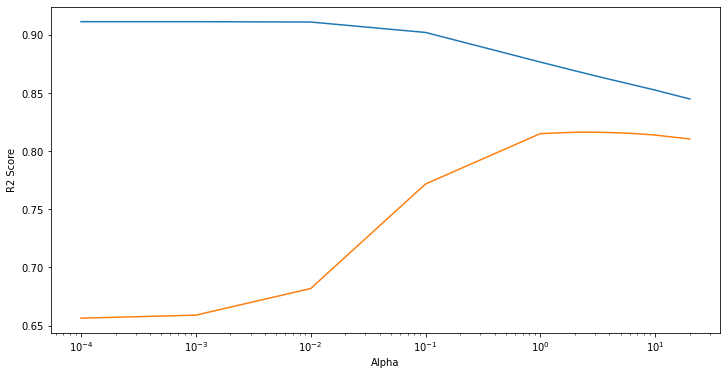

In [93]:
# plot r2_score using the defined function for ridge
r2_score(cv_result_train_ridge, True)

In [94]:
print('For Ridge, the Best Alpha value = ', model_cv.best_params_['alpha'])

For Ridge, the Best Alpha value =  2.0


In [95]:
# Now that we have optimal value of alpha = 2, we can use this alpha to run the model again
#Ridge
ridge = Ridge(alpha=2)
ridge.fit(X_train,y_train)

# train score
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))

# test score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_test_pred))

print(mean_squared_error(y_test,y_test_pred))

0.8679708993068388
0.8434980074415632
0.16381857209404352


In [96]:
# ridge coefficients
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col = col.insert(0,'Constant')
list(zip(col,model_parameter))

[('Constant', -1.877),
 ('OverallQual', 0.392),
 ('BsmtFinSF1', 0.071),
 ('BsmtFinSF2', 0.024),
 ('BsmtUnfSF', -0.033),
 ('TotalBsmtSF', 0.048),
 ('CentralAir', -0.453),
 ('1stFlrSF', 0.32),
 ('2ndFlrSF', 0.279),
 ('MSZoning_FV', 0.349),
 ('MSZoning_RH', 0.369),
 ('MSZoning_RL', 0.551),
 ('MSZoning_RM', 0.256),
 ('Neighborhood_Blueste', 0.134),
 ('Neighborhood_ClearCr', 0.443),
 ('Neighborhood_Crawfor', 0.319),
 ('Neighborhood_NridgHt', 0.283),
 ('Neighborhood_Somerst', 0.389),
 ('Neighborhood_Veenker', 0.404),
 ('Condition1_Norm', 0.21),
 ('Condition1_PosA', 0.352),
 ('Condition1_RRNe', 0.171),
 ('Condition2_Feedr', 0.317),
 ('Condition2_Norm', 0.26),
 ('Condition2_PosA', 0.193),
 ('Condition2_PosN', -1.101),
 ('Condition2_RRAe', 0.036),
 ('Condition2_RRNn', 0.255),
 ('BldgType_Twnhs', -0.33),
 ('RoofStyle_Shed', 0.185),
 ('RoofMatl_CompShg', 0.532),
 ('RoofMatl_Membran', 0.328),
 ('RoofMatl_Metal', 0.186),
 ('RoofMatl_Roll', 0.126),
 ('RoofMatl_Tar&Grv', 0.378),
 ('RoofMatl_WdShake',

### Ridge Results on Test dataset
    *** R2 score = 0.8434 *** 

# Comparisons and effects of various alphas in ridge and lasso

In [97]:
def run_alphas(model,alphas):
    
    feature_ridge_df = pd.DataFrame(columns=['feature'], data=X_train.columns)
    feature_lasso_df = pd.DataFrame(columns=['feature'], data=X_train.columns)
    
    for alpha in alphas:
        if model == 'ridge':
            ridge = Ridge(alpha=alpha)
            ridge.fit(X_train, y_train)
            # Creating feature/coefficient map for future use
            feature_ridge_df['Alpha: '+str(alpha)] = ridge.coef_
        elif model == 'lasso':
            lasso = Lasso(alpha=alpha)
            lasso.fit(X_train, y_train)
            # Creating feature/coefficient map for future use
            feature_lasso_df['Alpha: '+str(alpha)] = lasso.coef_
    
    if model == 'ridge':
        return feature_ridge_df
    else:
        return feature_lasso_df

In [98]:
lasso_df = run_alphas('lasso',[0.001,0.002,0.01,0.02,0.05,5])

In [99]:
lasso_df.head()

,feature,Alpha: 0.001,Alpha: 0.002,Alpha: 0.01,Alpha: 0.02,Alpha: 0.05,Alpha: 5
0,OverallQual,0.399210,0.411491,0.476324,0.508898,0.553452,0.0
1,BsmtFinSF1,0.107159,0.103975,0.087221,0.077468,0.057157,0.0
2,BsmtFinSF2,0.035614,0.035246,0.025596,0.012221,0.000000,0.0
3,BsmtUnfSF,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0
4,TotalBsmtSF,0.008731,0.011132,0.029086,0.044290,0.061317,0.0


In [100]:
print(lasso_df[lasso_df['Alpha: 0.001'] == 0][['feature', 'Alpha: 0.001']].shape)
print(lasso_df[lasso_df['Alpha: 0.002'] == 0][['feature', 'Alpha: 0.002']].shape)
print(lasso_df[lasso_df['Alpha: 0.01'] == 0][['feature', 'Alpha: 0.01']].shape)
print(lasso_df[lasso_df['Alpha: 0.02'] == 0][['feature', 'Alpha: 0.02']].shape)
print(lasso_df[lasso_df['Alpha: 0.05'] == 0][['feature', 'Alpha: 0.05']].shape)
print(lasso_df[lasso_df['Alpha: 5'] == 0][['feature', 'Alpha: 5']].shape)

(19, 2)
(23, 2)
(34, 2)
(39, 2)
(43, 2)
(50, 2)


### Conclusion - For Lasso, As we increase the alpha, more coefficients become zero 

#### Lasso alphas

In [101]:
# We know alpha = 0.001 is optimal value
lasso_df = lasso_df[['feature','Alpha: 0.001', 'Alpha: 0.002']]
lasso_df = lasso_df.reindex(lasso_df['Alpha: 0.002'].abs().sort_values(ascending=False).index)
lasso_df['predictors'] = lasso_df['feature'].apply(lambda x:x.split('_')[0])

In [102]:
lasso_df

,feature,Alpha: 0.001,Alpha: 0.002,predictors
24,Condition2_PosN,-2.604454,-1.529683,Condition2
5,CentralAir,-0.465423,-0.450719,CentralAir
0,OverallQual,0.399210,0.411491,OverallQual
16,Neighborhood_Somerst,0.379891,0.378207,Neighborhood
13,Neighborhood_ClearCr,0.456038,0.368530,Neighborhood
6,1stFlrSF,0.326116,0.316658,1stFlrSF
10,MSZoning_RL,0.356535,0.294453,MSZoning
17,Neighborhood_Veenker,0.371549,0.290061,Neighborhood
40,Exterior2nd_Stucco,-0.377252,-0.284384,Exterior2nd
27,BldgType_Twnhs,-0.304051,-0.275799,BldgType


In [103]:
x = lasso_df[['feature','Alpha: 0.002','predictors']]

#### Ridge alphas

In [104]:
ridge_df = run_alphas('ridge',[2,4])

In [105]:
ridge_df.head()

,feature,Alpha: 2,Alpha: 4
0,OverallQual,0.391599,0.399174
1,BsmtFinSF1,0.071157,0.069505
2,BsmtFinSF2,0.023977,0.025548
3,BsmtUnfSF,-0.033474,-0.033121
4,TotalBsmtSF,0.048268,0.047524


In [106]:
# We know alpha = 2 is optimal value
ridge_df = ridge_df[['feature','Alpha: 2','Alpha: 4']]
ridge_df = ridge_df.reindex(ridge_df['Alpha: 2'].abs().sort_values(ascending=False).index)
ridge_df['predictors'] = ridge_df['feature'].apply(lambda x:x.split('_')[0])

In [107]:
ridge_df

,feature,Alpha: 2,Alpha: 4,predictors
24,Condition2_PosN,-1.100863,-0.665187,Condition2
35,RoofMatl_WdShngl,0.578487,0.347626,RoofMatl
10,MSZoning_RL,0.551487,0.410052,MSZoning
29,RoofMatl_CompShg,0.531794,0.336471,RoofMatl
42,Heating_GasW,0.474618,0.337298,Heating
5,CentralAir,-0.452579,-0.448628,CentralAir
13,Neighborhood_ClearCr,0.443381,0.402299,Neighborhood
37,Exterior1st_BrkComm,-0.405699,-0.267622,Exterior1st
17,Neighborhood_Veenker,0.403724,0.347278,Neighborhood
40,Exterior2nd_Stucco,-0.394126,-0.343179,Exterior2nd


# Effect of doubling the alpha on Ridge****


In [108]:
ridge = Ridge(alpha=4)
ridge.fit(X_train,y_train)

# train score
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train, y_train_pred))

# test score
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test, y_test_pred))

0.860855087785482
0.8462099182001803


# > If we remove the first 5 selections of predictors.We will be removing the features from the same test and train data as we did for SalePrice
# We would be doing this for the lasso regression as lasso tends to minimize the Beta coeffcient values to 0 for non significant features

In [109]:
# Updating X data
df_train.drop(['Condition2_PosN','CentralAir', 'OverallQual','Neighborhood_Somerst', 'Neighborhood_ClearCr'], axis=1, inplace = True)
X_train = df_train

df_test.drop(['Condition2_PosN','CentralAir', 'OverallQual','Neighborhood_Somerst', 'Neighborhood_ClearCr'], axis=1, inplace = True)
X_test = df_test

In [110]:
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

#train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

#test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col = col.insert(0,'Constant')
list(zip(col,model_parameter))


folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.0001,0.001,0.01,0.1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

print('For Lasso, the Best Alpha value after removing the best features = ', model_cv.best_params_['alpha'])

0.9020048169908691
0.8709116585471446
Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


For Lasso, the Best Alpha value after removing the best features =  0.001


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.3s finished


In [111]:
#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

lasso_df = run_alphas('lasso',[0.001])

lasso_df = lasso_df[['feature','Alpha: 0.001']]
lasso_df = lasso_df.reindex(lasso_df['Alpha: 0.001'].abs().sort_values(ascending=False).index)
lasso_df['predictors'] = lasso_df['feature'].apply(lambda x:x.split('_')[0])

lasso_df.head(5)

0.9020048169908691
0.8709116585471446


,feature,Alpha: 0.001,predictors
47,MSZoning_FV,0.559524,MSZoning
116,RoofMatl_WdShngl,0.375777,RoofMatl
66,Neighborhood_MeadowV,-0.360308,Neighborhood
49,MSZoning_RL,0.343851,MSZoning
72,Neighborhood_NridgHt,0.342507,Neighborhood


# Effect of doubling the alpha on Lasso(Train and Test Score)****

In [112]:
lm = Lasso(alpha=0.002)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

# test score
y_test_pred  = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8914719437487669
0.8678950366993137
